<a href="https://colab.research.google.com/github/pranava-25/Codsoft/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
def load_data(path):
    df = pd.read_csv("/content/spam.csv", encoding="latin-1")
    df = df[['v1', 'v2']]
    df.columns = ['label', 'message']
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})
    return df

In [ ]:
def vectorize_text(X_train, X_test):
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    return X_train_vec, X_test_vec, vectorizer

In [ ]:
def train_and_evaluate(X_train_vec, X_test_vec, y_train, y_test):
    models = {
        "Naive Bayes": MultinomialNB(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": LinearSVC()
    }

    best_model = None
    best_acc = 0

    for name, model in models.items():
        model.fit(X_train_vec, y_train)
        preds = model.predict(X_test_vec)
        acc = accuracy_score(y_test, preds)

        print(f"\n{name} Accuracy: {acc:.4f}")
        print(classification_report(y_test, preds))

        if acc > best_acc:
            best_acc = acc
            best_model = model

    return best_model

In [ ]:
def predict_message(model, vectorizer, message):
    msg_vec = vectorizer.transform([message])
    prediction = model.predict(msg_vec)[0]
    return "Spam" if prediction == 1 else "Ham"

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

In [ ]:
def main():
    df = load_data("spam.csv")
    X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
    X_train_vec, X_test_vec, vectorizer = vectorize_text(X_train, X_test)

    best_model = train_and_evaluate(X_train_vec, X_test_vec, y_train, y_test)
    y_pred = best_model.predict(X_test_vec)
    joblib.dump(best_model, "best_spam_model.pkl")
    joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
    print("\nSaved the best model and vectorizer to disk.")
    plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Best Model")
    sample_msg = "Congratulations! You've won a free ticket to Bahamas. Call now!"
    result = predict_message(best_model, vectorizer, sample_msg)
    print(f"\nPrediction for sample message: '{sample_msg}' => {result}")


Naive Bayes Accuracy: 0.9668
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Logistic Regression Accuracy: 0.9525
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


SVM Accuracy: 0.9785
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93     

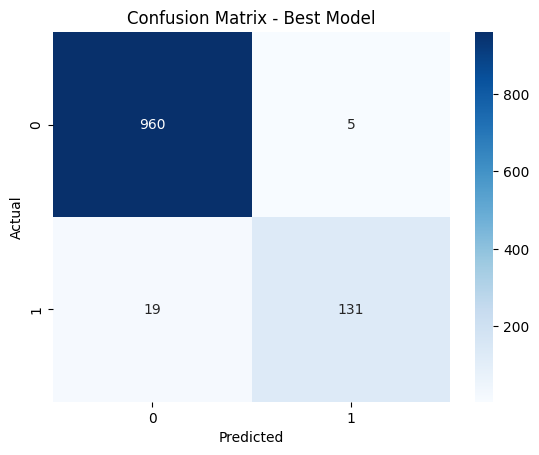


Prediction for sample message: 'Congratulations! You've won a free ticket to Bahamas. Call now!' => Ham


In [ ]:
if __name__ == "__main__":
    main()